# Feature Selection
## Regression - Numerical Input


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression

In [2]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
                       random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [19]:
fs = SelectKBest(score_func=f_regression, k=70)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

<BarContainer object of 100 artists>

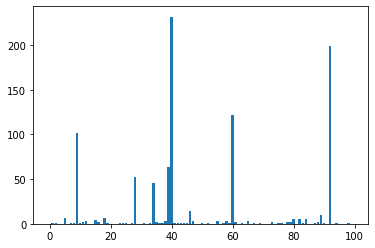

In [20]:
plt.bar([i for i, _ in enumerate(fs.scores_)], fs.scores_)

Further information on feature selection with ANOVA [here](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.999999725955

In [22]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
model.score(X_test_fs, y_test)

0.9999997425626881

In [23]:
def test_best_number_features(i):
    fs = SelectKBest(score_func=f_regression, k=i)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_fs, y_train)
    return model.score(X_test_fs, y_test)

In [24]:
lower_bound = 40  # 67

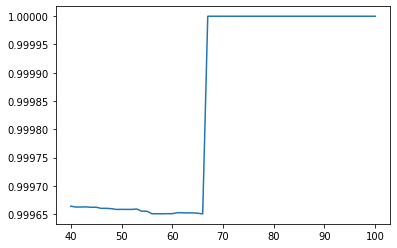

In [25]:
plt.plot(range(lower_bound,101), [test_best_number_features(i) for i in range(lower_bound,101)])